In [2]:
import os
import sys
import cv2
import numpy as np
from lib.utility import train_test_split


stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
sys.stderr = stderr

import matplotlib.pyplot as plt
sys.path.append(os.path.join(sys.path[0], '../../screenqual/models/banner_classification'))

from neural_network import model_classify

In [3]:
path_to_images = "../../puppeteer/document/image_with_and_without_banner/"
list_img_name = []

for img_name in os.listdir(path_to_images):
    if img_name.endswith('.jpg'):
        list_img_name.append(img_name)

In [4]:
N_img = len(list_img_name)
N_classes = 2
data_img = np.empty((N_img, 100, 100, 3))
y_data = np.empty((N_img))

for i, img_name in enumerate(list_img_name):
    img = cv2.imread(path_to_images+img_name)
    _,img_w,_ = img.shape
    data_img[i] = cv2.resize(img[:img_w//3,:], (100, 100))
    y_data[i] = 1 if img_name.endswith('_banner.jpg') else 0

data_img/=255
y_data = np_utils.to_categorical(y_data, N_classes)

In [15]:
test_size = 150
X_train, X_val, y_train, y_val = train_test_split(data_img, y_data, percentage=0.1)
X_test = X_train[-test_size:,:,:,:]
X_train = X_train[:-test_size,:,:,:]
y_test = y_train[-test_size:]
y_train = y_train[:-test_size]

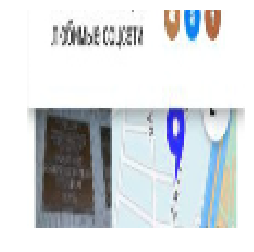

In [ ]:
plt.axis("off")
plt.imshow(X_train[0])
plt.show()

In [ ]:
model = model_classify()
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
               metrics=['accuracy']) 

checkpointer = ModelCheckpoint(filepath="weights_sign1.hdf5", verbose=1, save_best_only=True, save_weights_only=True)

model.fit(X_train, y_train,
                epochs=20,
                batch_size=16,
                shuffle=True,
                validation_data=(X_val, y_val),
                callbacks=[checkpointer])

Train on 3161 samples, validate on 367 samples
Epoch 1/2
